## LESSON 02: FUNDAMENTALS OF ML AND STATISTICAL LEARNING

### 1. Metadata  
This dataset marks secured by the students in math, reading, and writing in percentage.

- **id**: numerical, unique for each student.
- **race/ethnicity**: categorical, one value from (Group A, Group B, Group C,Group D, Group E).
- **parental level of education**: categorical,the highest level of education attained by any parent residing in the same household as the child.
- **lunch**: categorical, one of (standart, free/reduced).
- **test preparation course**: categorical, one of (none, comleted).
- **math percentage**: numerical, values form 0 to 1.  
- **reading score percentage**: numerical, values form 0 to 1.
- **writing score percentage**: numerical, values form 0 to 1. 
- **sex**: categorical, F (female) or M (male).

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
# Define the column names as a list
column_names = ['id','race/ethnicity','parental level of education','lunch','test preparation course',
                'math percentage','reading score percentage','writing score percentage','sex']

### 2. Load Dataset

In [3]:
dataset = pd.read_csv("dataset/Student Performance new.csv", 
                      names = column_names, sep = ",", skipinitialspace=True, usecols=lambda column: column != 'id')
dataset.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M


In [4]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  1000
#Features =  8


In [5]:
# checking the missing values
dataset[dataset.eq("?").any(axis=1)].head()

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex


In [6]:
# replace data with '?' by NaN
dataset.replace("?", np.nan, inplace=True)
dataset[dataset.isna().any(axis=1)].head()
print("#Samples with missing values = ", len(dataset[dataset.isna().any(axis=1)]))

#Samples with missing values =  0


Filtering missing values

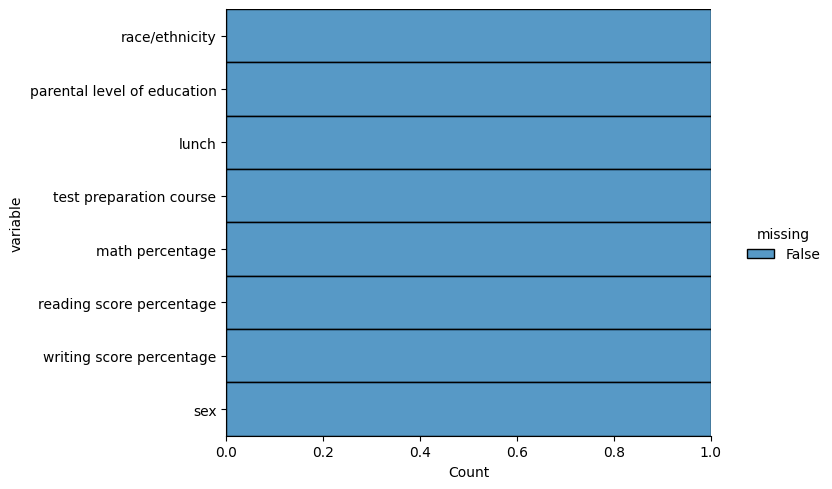

In [7]:
# plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5,
    color='lightgreen'
)

plt.show()

----

Comment: This graph shows the presence of missing data for each variable. We can see that there are none in this dataset.

----

In [8]:
dataset = dataset.dropna()
print("#Total samples without missing values = ", len(dataset))

#Total samples without missing values =  1000


### 3. Descriptive Statistical Analysis

#### Numerical variables

In [9]:
# list of numerical variables 
numerical_cols = ['math percentage','reading score percentage','writing score percentage']
numerical_cols

['math percentage', 'reading score percentage', 'writing score percentage']

Histogram with Frequencies

In [10]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    plt.figure(figsize=(5, 5))
    sbn.histplot(data[column], color = "lightgreen", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    
    plt.title("Histogram distribution for " + column)  
    plt.show()

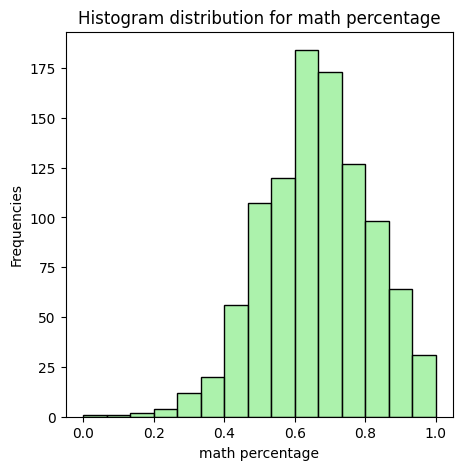

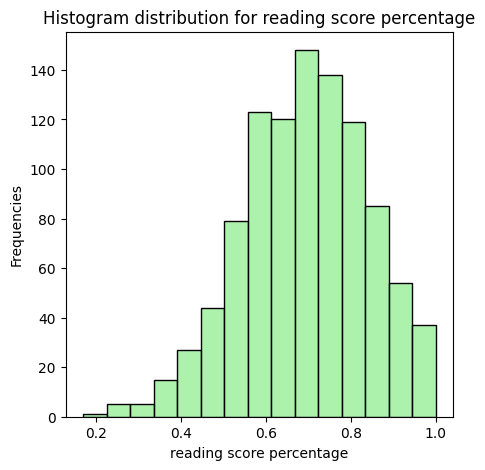

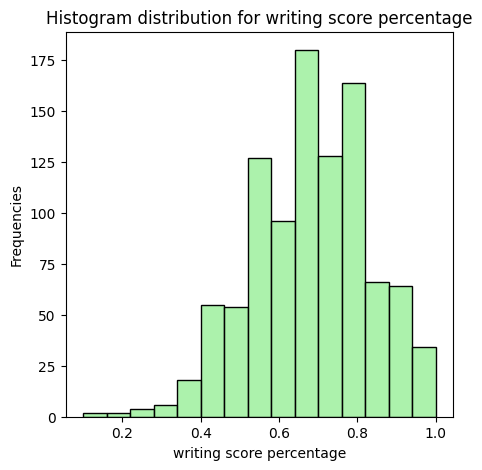

In [11]:
# plot the distribution for each numerical column
for col in numerical_cols:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')
    hist_frequencies(dataset, col, 15)

----

**Comment**: These histograms show the quantitative distribution of each numerical column.
1. math percentage: the most common math score is around 0.6 - 0.7 (more than 175 students), very low values ​​are very rare.
2. reading score percentage: the peak is around 0.7 (more than 140 students). Values ​​close to zero are also rare (less than 20).
3. writing score percentage: similar to the previous cases, the peak is at 0.7 (more than 175), but not much less than 0.8 (160 students).

----

Histogram with Densities and KDE line (kernel density estimate)

The Kernel Density Estimator provides a smooth curve that represents the distribution of data points based on estimating the probability density function of a random variable:  
$$ \hat{f}(x; h) = \frac{1}{n} \sum_{i=1}^{n} K_h(x - X_i) $$  
Where:  
* n: total number of data points
* $X_i$: observed data points
* $K_h$: kernel function scaled by the bandwidth h
$$ K_h(z) = \frac{1}{h} K\left(\frac{z}{h}\right) $$ 
* $K$: Gaussian Kernel  
$$ K(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} $$

In [12]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "lightgreen", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "orange", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)    
    plt.show()

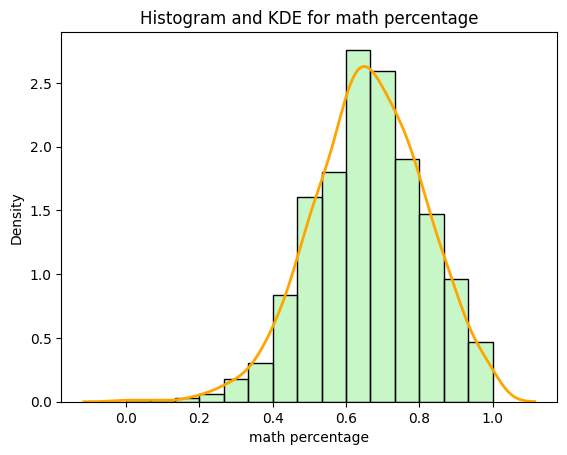

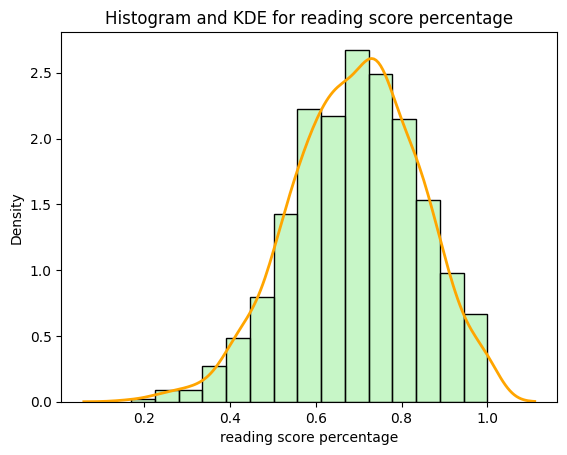

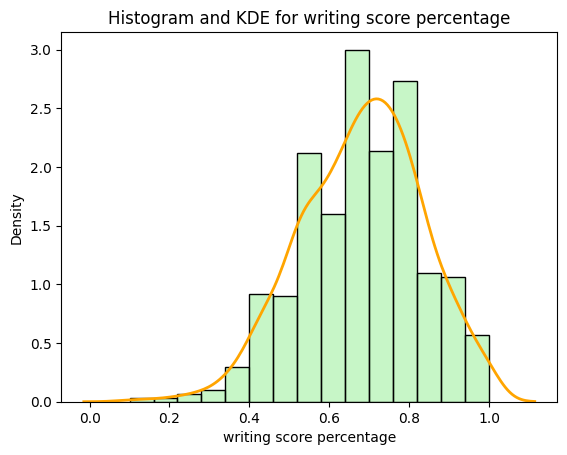

In [13]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 15)

----

**Comment**: The Gaussian kernel shows the similarity between data points by measuring their distance in a way that emphasizes closer points more strongly, creating a smooth, bell-shaped curve in the feature space.
Therefore, these histogram and curve images show the same data as the previous ones.

----

Box Plot

In [14]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 3
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i], color='lightpink')
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

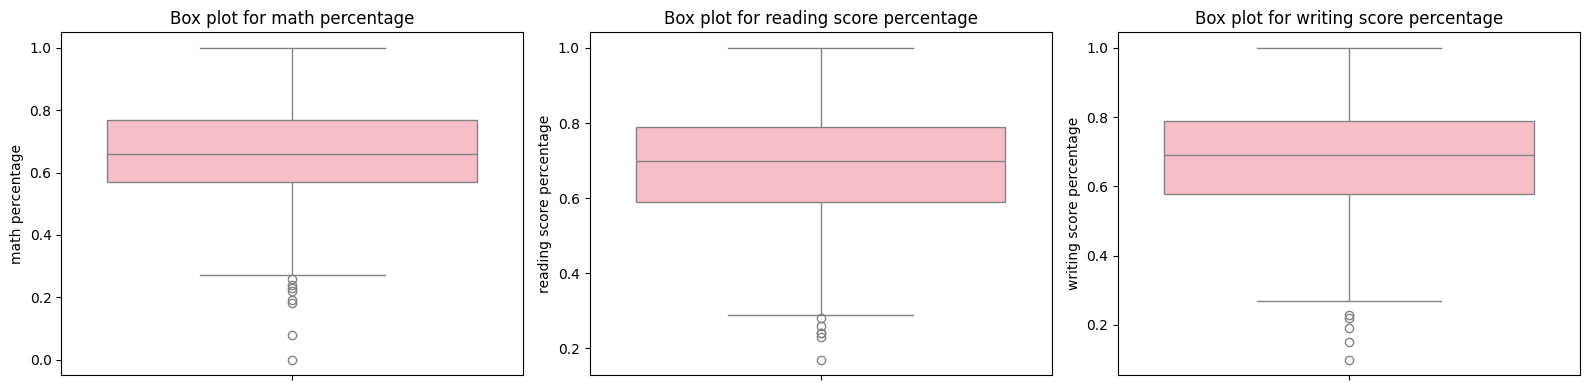

In [15]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

----
**Comment**:
- A box plot is a graphical representation of data that displays its distribution through five summary statistics: the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. The box shows the interquartile range (IQR) between Q1 and Q3, while "whiskers" extend to the minimum and maximum values, highlighting potential outliers outside this range.
- So we can see that in every case plots look similar, they have some outliers underneath, the mean value is about 0.7 or a little bit less. 
----

Statistical metrics

In [16]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,math percentage,reading score percentage,writing score percentage
count,1000.000000,1000.000000,1000.000000
mean,0.660890,0.691690,0.680540
std,0.151631,0.146002,0.151957
min,0.000000,0.170000,0.100000
25%,0.570000,0.590000,0.577500
50%,0.660000,0.700000,0.690000
75%,0.770000,0.790000,0.790000
max,1.000000,1.000000,1.000000


----

**Comment**: Here we can see some information about numerical columns, for example the number of values or min values. 

----

Correlation Analysis

The correlation between 2 variables quantify the linear relationship between the variables X and Y:  
$$ r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$   
Where:  
  
$r$: pearson correlation coefficient  
$Cov(x, y)$: covariance between variables X and Y. It measures how much the two variables change together.  
$\sigma_X, \sigma_Y$: standard deviations for variables X and Y.  

Formula of Covariance:  
$$ \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$  
Formula for standard deviation for X:  
$$ \sigma_X = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2} $$  
Formula for standard deviation for Y:  
$$ \sigma_Y = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2} $$  

In [17]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black', fontsize=7)
    plt.title("Correlation Analysis")
    plt.colorbar()    
    plt.show()

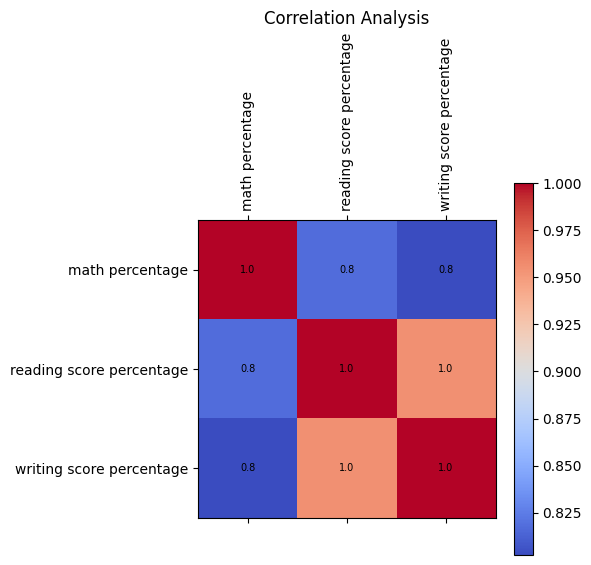

In [18]:
plot_correlation(dataset, numerical_cols)

----
**Comment**:
- Here we see the analysis of correlation - the dependence of some values ​​on others. The closer the value is to 1, the greater the dependence. 
- In this dataset, the largest dependence is observed between writing score percentage and reading score percentage, but the dependence for mathematics with these variables is also large.
----

Implications of Low Correlation

- **Independence of Features**:  
Low correlation suggests that the features are likely independent of each other. 
This can be beneficial because independent features provide unique information to the model, which can improve its performance.
- **Feature Redundancy**:   
When features are not correlated, it reduces the risk of redundancy. 
Including redundant features (highly correlated) can lead to issues like multicollinearity, making it difficult to interpret the model and possibly degrading its performance.
- **Model Complexity**:  
Low correlation may indicate that the model needs to learn more complex relationships to make accurate predictions. 
If features do not provide overlapping information, the model may require more sophisticated techniques (like polynomial regression or interaction terms) to capture the underlying patterns.
- **Feature Selection**:  
In some cases, low-correlation features might be candidates for removal if they do not contribute significantly to the predictive power of the model. 

**Outliers detection using Z-Score**  
The Z-score is the number of standard deviations from the mean that a data point is.  
The formula for the Z-score is:  
$$ Z = \frac{x - \mu}{\sigma} $$

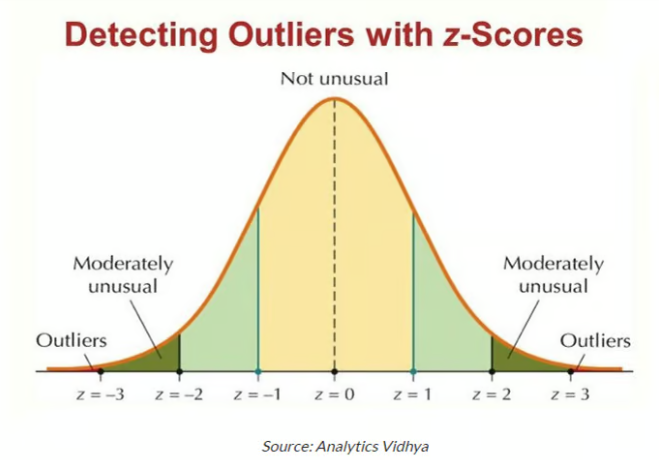

In [19]:
# function to plot gaussian kernel
def plot_gaussian_kernel(mean=0, std_dev=1, num_points=1000):    
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)
    
    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

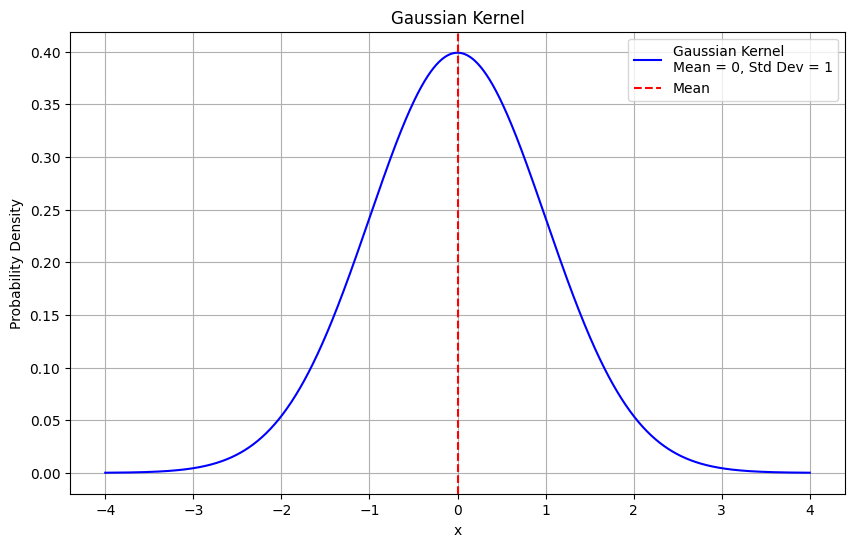

In [20]:
# standard gaussian kernel
plot_gaussian_kernel(mean=0, std_dev=1)

In [21]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile


In [22]:
call_percentile(z = -2)

2.275

In [23]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    return outliers

In [24]:
outliers_detection(dataset, "math percentage").head()

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
17,group B,some high school,free/reduced,none,0.18,0.32,0.28,F
34,group E,some college,standard,none,0.97,0.87,0.82,M
55,group C,high school,free/reduced,none,0.33,0.41,0.43,F
59,group C,some high school,free/reduced,none,0.00,0.17,0.10,F
76,group E,some high school,standard,none,0.30,0.26,0.22,M


----
**Comment**: Here we can see some outliers for math percentage. In this case they are students with too low values: 0.18, 0.97, 0.33, 0, 0.30.

----

In [25]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in math percentage ***
#samples outlier to distribution = 44
%outliers = 4.4 %

*** Outliers detection in reading score percentage ***
#samples outlier to distribution = 40
%outliers = 4.0 %

*** Outliers detection in writing score percentage ***
#samples outlier to distribution = 44
%outliers = 4.4 %


#### Categorical Variables

In [26]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'sex']

Count instances for each categorical column

In [27]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** race/ethnicity ******
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

***** parental level of education ******
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

***** lunch ******
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

***** test preparation course ******
test preparation course
none         642
completed    358
Name: count, dtype: int64

***** sex ******
sex
F    518
M    482
Name: count, dtype: int64


Bar chart - Analysis of absolute frequencies

In [28]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    plt.figure(figsize=(7, len(results.index.tolist()) * 0.3))
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y", color='lightblue')
    plt.title("Statistical analysis by " + col)
    plt.show()

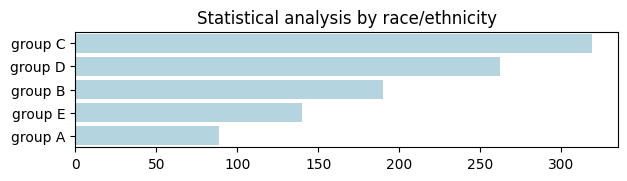

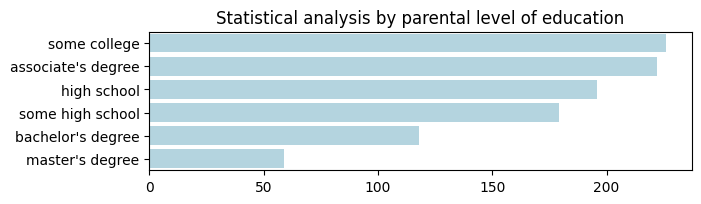

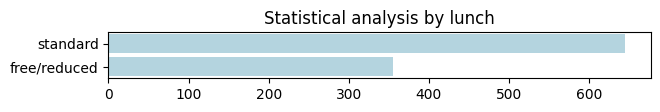

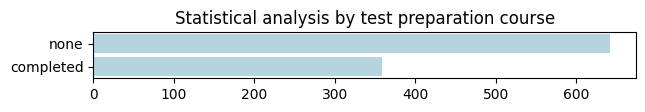

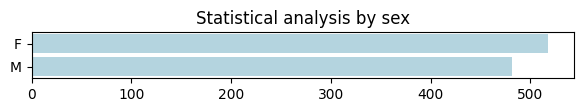

In [29]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

----
**Comment**: 
these graphs show the distribution by the number of each value of each categorical column.
1. race/ethnicity: there are 5 groups in total, the most common is group C (more than 300 students), the smallest is group A.
2. lunch: most students have a standard lunch.
3. sex: the distribution is almost the same, but female a little more.
4. parental level of education: most of all some college or associate's degree (more than 200 students), the least students whose parents have a master's degree
5. test preparation course: more than 600 students did not take this course, about 250 did.
----

Pie Chart - Analysis of relative frequencies

In [30]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    # Use pastel color palette from seaborn
    pastel_colors = sbn.color_palette("pastel", n_colors=100)
    sbn.set_style("whitegrid")
    plt.figure(figsize=(10, 10))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%',  textprops={'fontsize': 7}, colors=pastel_colors,)
    plt.title("Relative frequency analysis by " + col)
    plt.show()

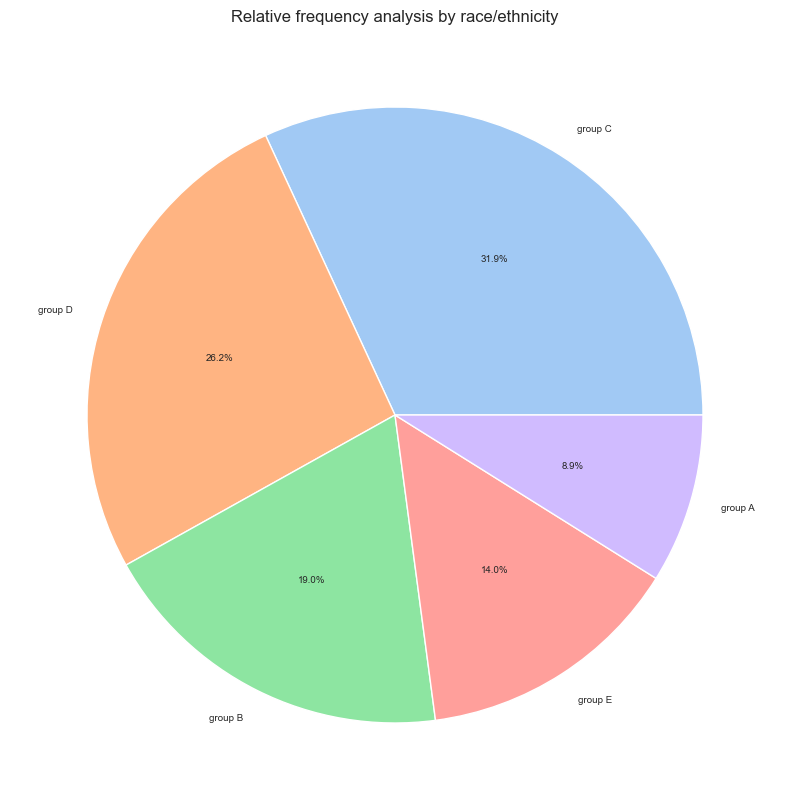

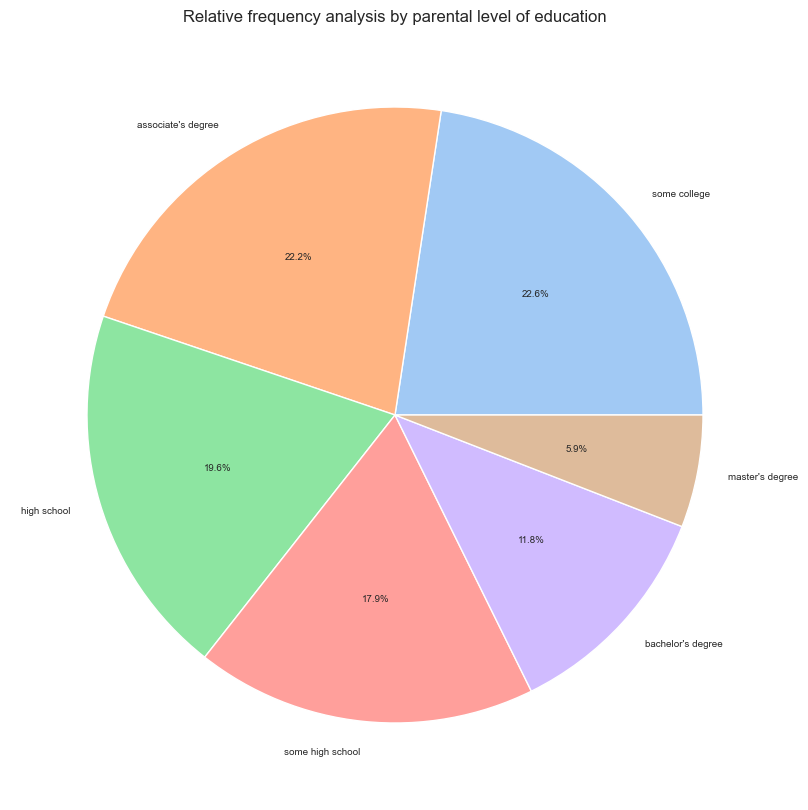

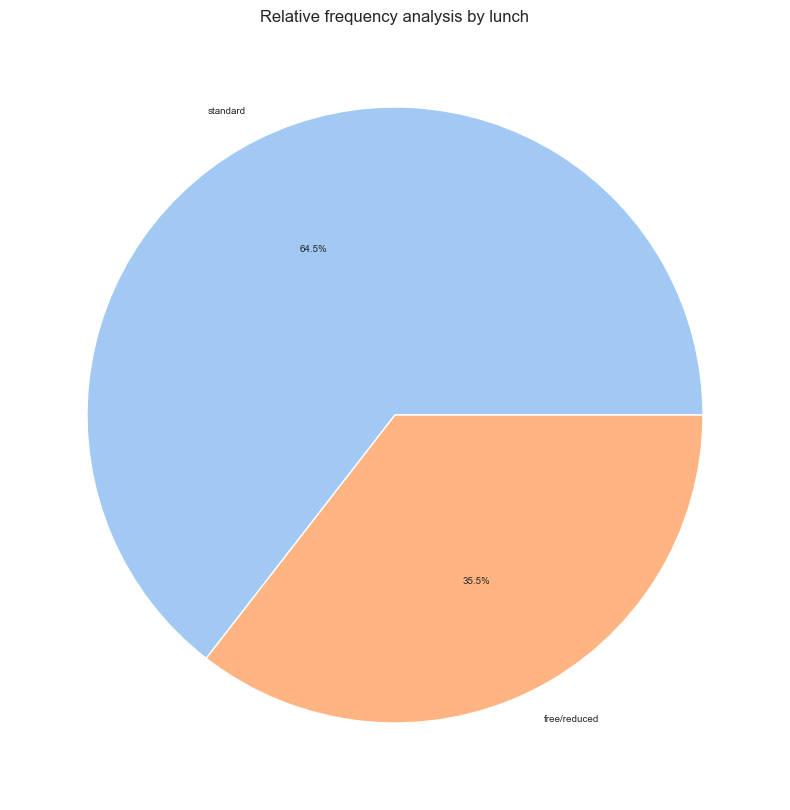

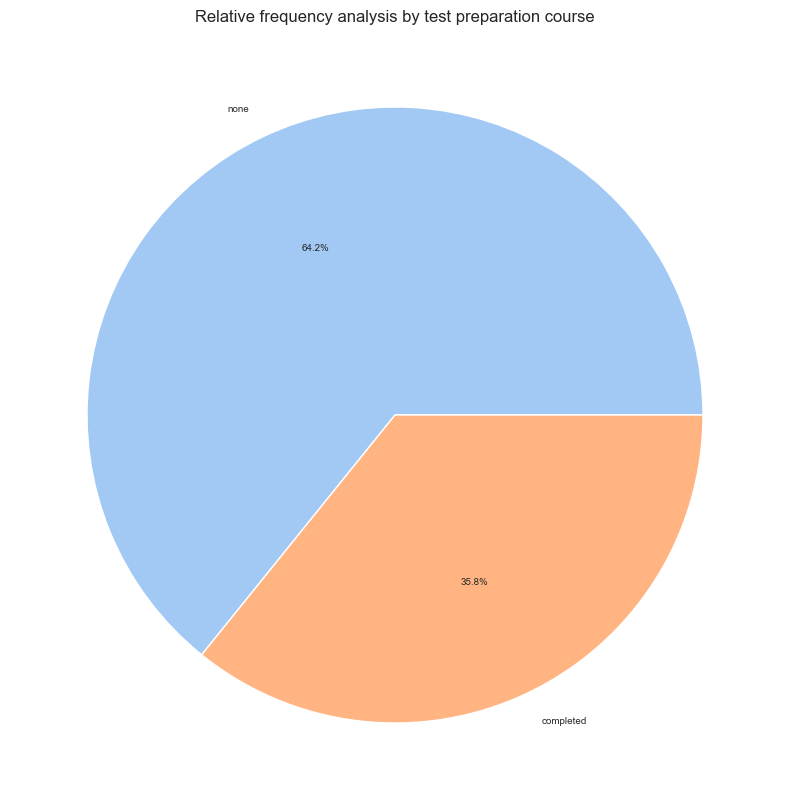

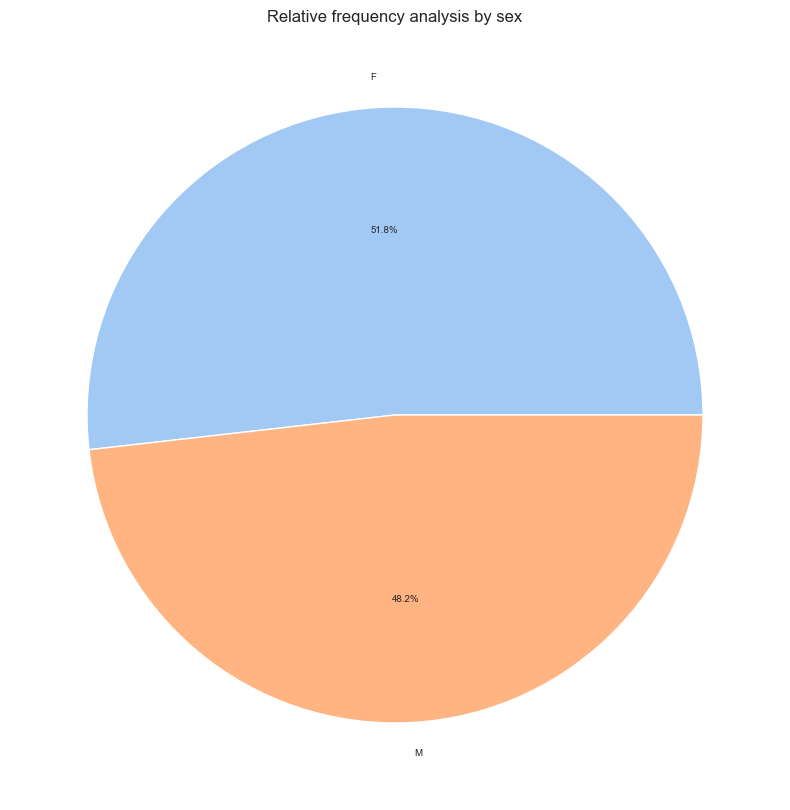

In [31]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

----
**Comment**:
- Pie charts already show a relative analysis of the number of values ​​of each categorical column, that is, in percentage terms.
- For example, we see that female students are 51.8%, while male students are 48.2%.
----

Statistical Analysis for subgroups 

In [32]:
# create groups organized by sex and income
group_size_grooming = dataset.groupby(["sex", "race/ethnicity"]).size().reset_index(name = "samples")
print(group_size_grooming)

  sex race/ethnicity  samples
0   F        group A       36
1   F        group B      104
2   F        group C      180
3   F        group D      129
4   F        group E       69
5   M        group A       53
6   M        group B       86
7   M        group C      139
8   M        group D      133
9   M        group E       71


In [33]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('Size')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by sex and race/ethnicity')
    plt.tight_layout()
    plt.show()

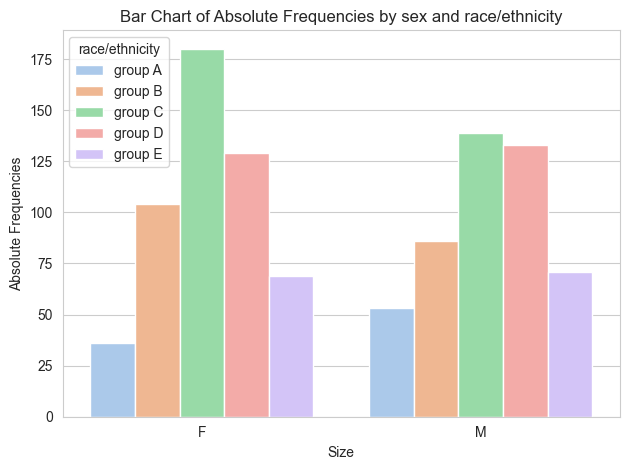

In [34]:
plot_absfreq_groups(group_size_grooming, "sex", "race/ethnicity")

----
**Comment**: this chart shows the distribution of absolute frequencies of race for female and male.
- for example, female students from group C - ~175 while male - ~135
- however for group D the situation is opposite: there are more male student than female.
- groups where there are more female students: A, B
- groups where there are more male students: A, D, E
----

In [35]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1].astype(str) + " " + group[g2].astype(str)
    sizes = group["samples"]
    plt.figure(figsize=(7, 7))
    pastel_colors = sbn.color_palette("pastel", n_colors=100)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10}, colors=pastel_colors)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by sex and race/ethnicity')

    plt.show()

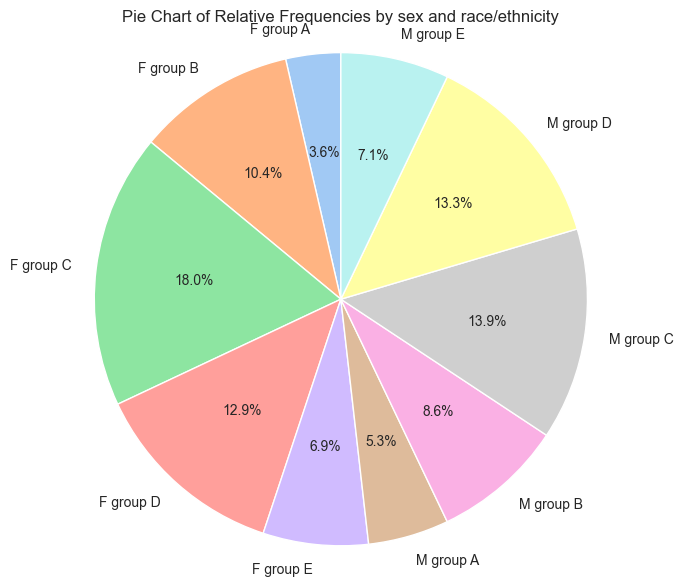

In [36]:
plot_relfreq_groups(group_size_grooming, "sex", "race/ethnicity")

----
**Comment**: the pie chart shows relative frequencies for every combinations of sex and race/ethnicity.
- we can see that "F group C" (female students from group C) has the biggest percentage (18%)
- "F group A" (female students from group A) has the lowest percentage (3.6%)
----

----
**CONCLUSION**
Having studied the data from the dataset in various ways, we come to the conclusion that a very powerful and useful tool for data analysis is the presentation of this information graphically in the form of graphs (histograms, pie charts, box plots, and also Gaussian kernel).

----